In [1]:
import pandas as pd
import fsrs_optimizer

timezone = "Europe/Moscow"
next_day_starts_at = 4
revlog_start_date = "2006-10-05"  # YYYY-MM-DD
filter_out_suspended_cards = False
filter_out_flags = []

In [2]:
from anki.collection import Collection


optimizer = fsrs_optimizer.Optimizer()
optimizer.anki_extract("./Main_27.04.2023.apkg",
                       filter_out_suspended_cards, filter_out_flags)
optimizer.create_time_series(
    timezone, revlog_start_date, next_day_starts_at, analysis=False)

col = Collection("./collection.anki21")
second_level_decks = list(map(lambda x: x.name, filter(
    lambda x: len(x.name.split("::")) == 2, col.decks.all_names_and_ids())))
df = pd.read_csv("./revlog_history.tsv", sep="\t")
dfs = [df[df['card_id'].isin(tuple(col.find_cards(f"deck:{name}")))].copy(
) for name in second_level_decks]
dfs = list(filter(lambda x: len(x) >= 1000, dfs))
print(len(dfs))

Deck file extracted successfully!
revlog.csv saved.


  0%|          | 0/30507 [00:00<?, ?it/s]

Trainset saved.
6


In [3]:
ws = []
datasets = []

for df in dfs:
    optimizer.define_model()
    S0_dataset = df[df["i"] == 2].copy()
    optimizer.S0_dataset_group = (
        S0_dataset.groupby(by=["r_history", "delta_t"], group_keys=False)
        .agg({"y": ["mean", "count"]})
        .reset_index()
    )
    optimizer.pretrain(df.copy(), verbose=False)
    optimizer.train(verbose=False)
    datasets.append(optimizer.dataset.copy())
    ws.append(optimizer.w)

Pretrain finished!


  0%|          | 0/52261 [00:00<?, ?it/s]

Tensorized!
TRAIN: 39194 TEST: 13067
dataset built


train:   0%|          | 0/170850 [00:00<?, ?it/s]

TRAIN: 40708 TEST: 11553
dataset built


train:   0%|          | 0/170740 [00:00<?, ?it/s]

TRAIN: 43304 TEST: 8957
dataset built


train:   0%|          | 0/167770 [00:00<?, ?it/s]

TRAIN: 42046 TEST: 10215
dataset built


train:   0%|          | 0/170625 [00:00<?, ?it/s]

TRAIN: 43792 TEST: 8469
dataset built


train:   0%|          | 0/170235 [00:00<?, ?it/s]


Training finished!
Pretrain finished!


  0%|          | 0/24979 [00:00<?, ?it/s]

Tensorized!
TRAIN: 19586 TEST: 5393
dataset built


train:   0%|          | 0/96100 [00:00<?, ?it/s]

TRAIN: 19879 TEST: 5100
dataset built


train:   0%|          | 0/95990 [00:00<?, ?it/s]

TRAIN: 20150 TEST: 4829
dataset built


train:   0%|          | 0/95645 [00:00<?, ?it/s]

TRAIN: 20150 TEST: 4829
dataset built


train:   0%|          | 0/95770 [00:00<?, ?it/s]

TRAIN: 20151 TEST: 4828
dataset built


train:   0%|          | 0/95655 [00:00<?, ?it/s]


Training finished!
Pretrain finished!


  0%|          | 0/130457 [00:00<?, ?it/s]

Tensorized!
TRAIN: 104366 TEST: 26091
dataset built


train:   0%|          | 0/490120 [00:00<?, ?it/s]

TRAIN: 104366 TEST: 26091
dataset built


train:   0%|          | 0/478505 [00:00<?, ?it/s]

TRAIN: 104367 TEST: 26090
dataset built


train:   0%|          | 0/450750 [00:00<?, ?it/s]

TRAIN: 104364 TEST: 26093
dataset built


train:   0%|          | 0/454455 [00:00<?, ?it/s]

TRAIN: 104365 TEST: 26092
dataset built


train:   0%|          | 0/450970 [00:00<?, ?it/s]


Training finished!
Not enough data for first rating 1. Expected at least 1, got 0.
Pretrain finished!


  0%|          | 0/4579 [00:00<?, ?it/s]

Tensorized!
TRAIN: 3540 TEST: 1039
dataset built


train:   0%|          | 0/17310 [00:00<?, ?it/s]

TRAIN: 3688 TEST: 891
dataset built


train:   0%|          | 0/16855 [00:00<?, ?it/s]

TRAIN: 3688 TEST: 891
dataset built


train:   0%|          | 0/17200 [00:00<?, ?it/s]

TRAIN: 3699 TEST: 880
dataset built


train:   0%|          | 0/16955 [00:00<?, ?it/s]

TRAIN: 3701 TEST: 878
dataset built


train:   0%|          | 0/16920 [00:00<?, ?it/s]


Training finished!
Not enough data for first rating 1. Expected at least 1, got 0.
Pretrain finished!


  0%|          | 0/3953 [00:00<?, ?it/s]

Tensorized!
TRAIN: 3120 TEST: 833
dataset built


train:   0%|          | 0/13210 [00:00<?, ?it/s]

TRAIN: 3282 TEST: 671
dataset built


train:   0%|          | 0/13110 [00:00<?, ?it/s]

TRAIN: 3280 TEST: 673
dataset built


train:   0%|          | 0/13100 [00:00<?, ?it/s]

TRAIN: 3249 TEST: 704
dataset built


train:   0%|          | 0/13190 [00:00<?, ?it/s]

TRAIN: 2881 TEST: 1072
dataset built


train:   0%|          | 0/13250 [00:00<?, ?it/s]


Training finished!
Pretrain finished!


  0%|          | 0/32293 [00:00<?, ?it/s]

Tensorized!
TRAIN: 24782 TEST: 7511
dataset built


train:   0%|          | 0/119080 [00:00<?, ?it/s]

TRAIN: 26170 TEST: 6123
dataset built


train:   0%|          | 0/117565 [00:00<?, ?it/s]

TRAIN: 25829 TEST: 6464
dataset built


train:   0%|          | 0/118930 [00:00<?, ?it/s]

TRAIN: 26078 TEST: 6215
dataset built


train:   0%|          | 0/118750 [00:00<?, ?it/s]

TRAIN: 26313 TEST: 5980
dataset built


train:   0%|          | 0/118395 [00:00<?, ?it/s]


Training finished!


In [4]:
from fsrs_optimizer import Collection, power_forgetting_curve
from sklearn.metrics import log_loss

results = []

for w, dataset in zip(ws, datasets):
    my_collection = Collection(w)
    stabilities, difficulties = my_collection.batch_predict(dataset)
    dataset["stability"] = stabilities
    dataset["difficulty"] = difficulties
    dataset["p"] = power_forgetting_curve(dataset["delta_t"], dataset["stability"])
    results.append(dataset.copy())

dataset_join = pd.concat(results, ignore_index=True)
log_loss(dataset_join["y"], dataset_join["p"])

0.41428592985335

R-squared: 0.8557
RMSE: 0.0365
MAE: 0.0249
ICI: 0.0240
E50: 0.0178
E90: 0.0467
EMax: 0.3043
[0.2213225  0.73633298]

Last rating: 1
R-squared: 0.5518
RMSE: 0.0604
MAE: 0.0514
ICI: 0.0515
E50: 0.0526
E90: 0.0758
EMax: 0.2375
[0.30604547 0.60934179]

Last rating: 2
R-squared: 0.8375
RMSE: 0.0387
MAE: 0.0318
ICI: 0.0307
E50: 0.0289
E90: 0.0361
EMax: 0.2851
[0.18022656 0.7629298 ]

Last rating: 3
R-squared: 0.8364
RMSE: 0.0378
MAE: 0.0214
ICI: 0.0210
E50: 0.0114
E90: 0.0507
EMax: 0.2920
[0.23613064 0.73280509]

Last rating: 4
R-squared: -0.0088
RMSE: 0.0379
MAE: 0.0227
ICI: 0.0224
E50: 0.0137
E90: 0.0518
EMax: 0.1276
[0.41941382 0.58212838]


({'R-squared': 0.855732239799079,
  'RMSE': 0.0365078540577874,
  'MAE': 0.024866418625503577,
  'ICI': 0.024021138400275244},
 (<Figure size 640x480 with 2 Axes>,
  <Figure size 1600x1200 with 8 Axes>,
  <Figure size 640x480 with 2 Axes>,
  <Figure size 640x480 with 2 Axes>))

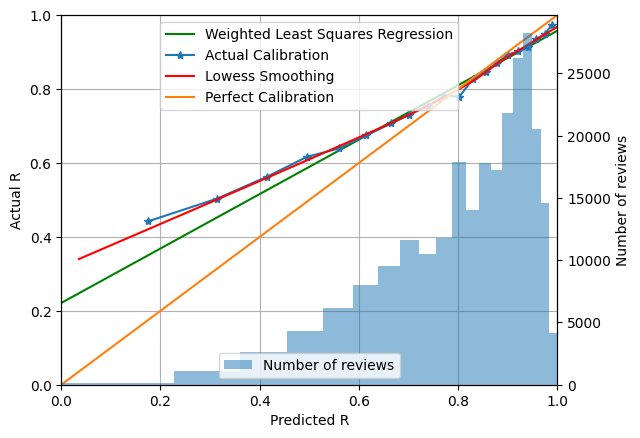

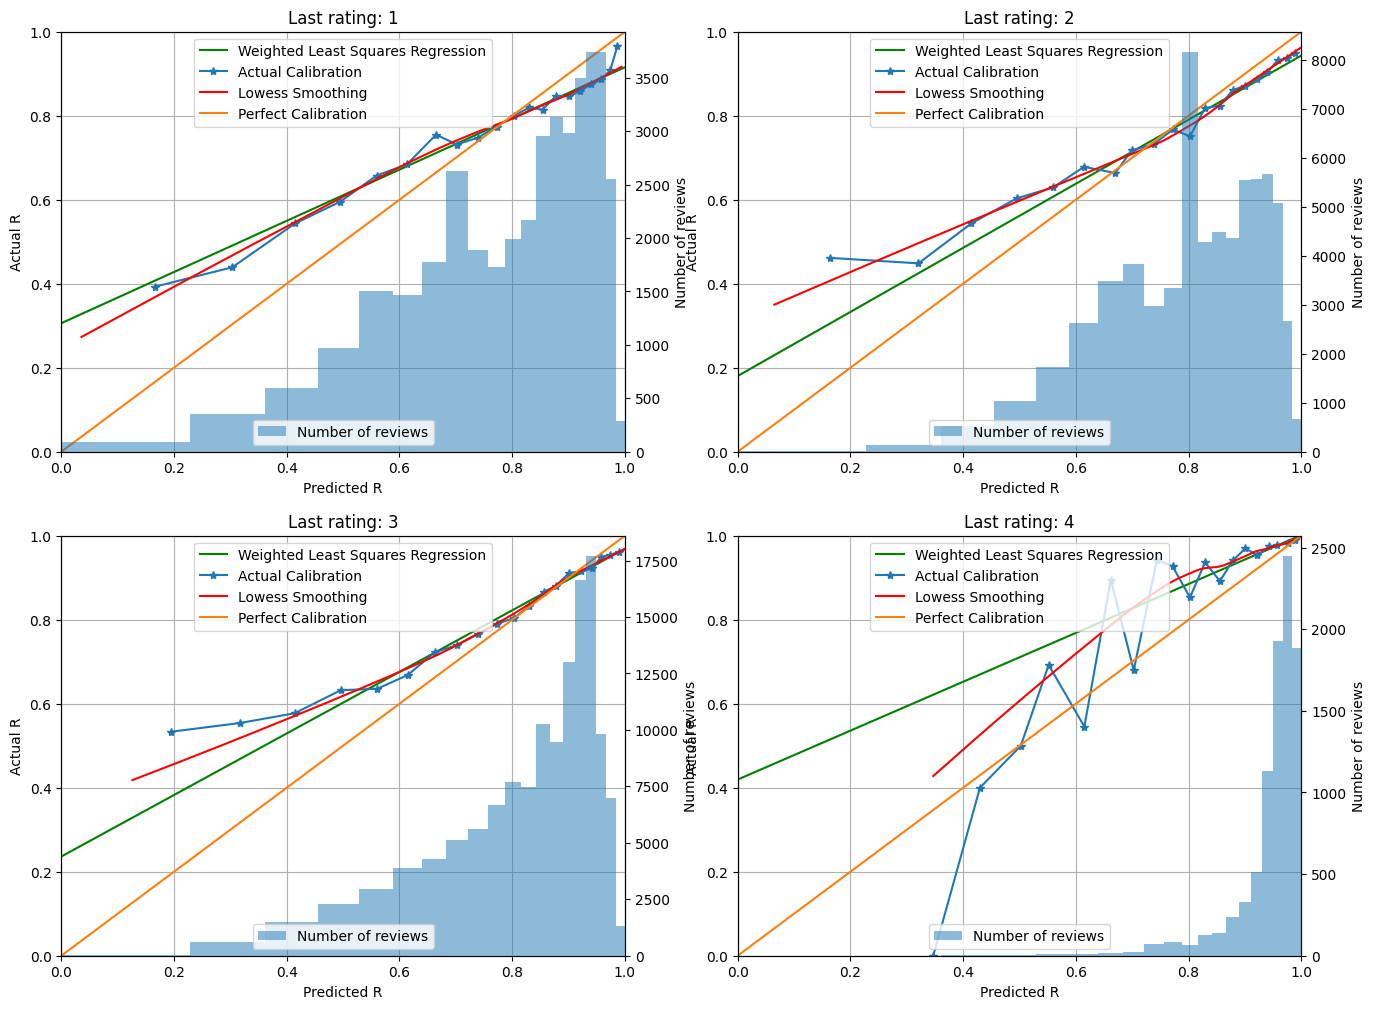

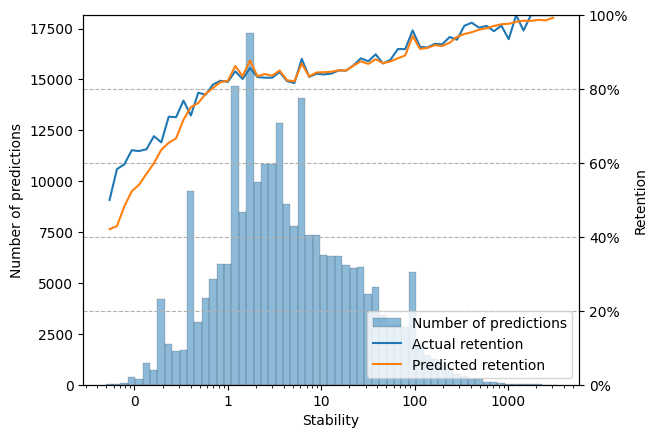

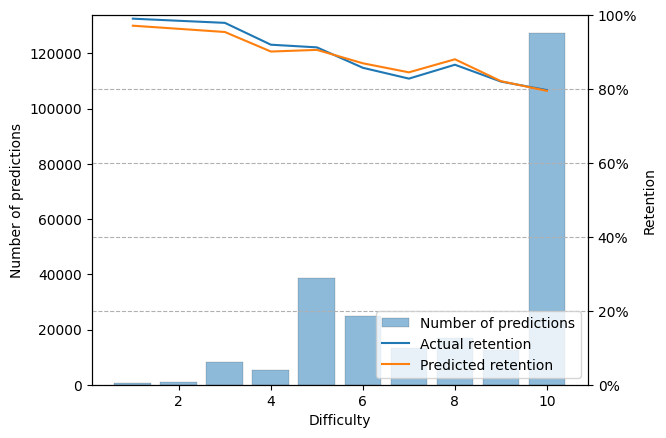

In [5]:
optimizer.calibration_graph(dataset_join)

Pretrain finished!


  0%|          | 0/248522 [00:00<?, ?it/s]

Tensorized!
TRAIN: 196607 TEST: 51915
dataset built


train:   0%|          | 0/918000 [00:00<?, ?it/s]

TRAIN: 200514 TEST: 48008
dataset built


train:   0%|          | 0/902390 [00:00<?, ?it/s]

TRAIN: 200515 TEST: 48007
dataset built


train:   0%|          | 0/859465 [00:00<?, ?it/s]

TRAIN: 198226 TEST: 50296
dataset built


train:   0%|          | 0/869750 [00:00<?, ?it/s]

TRAIN: 198226 TEST: 50296
dataset built


train:   0%|          | 0/848395 [00:00<?, ?it/s]


Training finished!
R-squared: 0.7929
RMSE: 0.0418
MAE: 0.0285
ICI: 0.0271
E50: 0.0208
E90: 0.0543
EMax: 0.3348
[0.25041576 0.70112891]

Last rating: 1
R-squared: 0.5529
RMSE: 0.0587
MAE: 0.0523
ICI: 0.0507
E50: 0.0511
E90: 0.0775
EMax: 0.2320
[0.30014522 0.6138684 ]

Last rating: 2
R-squared: 0.7332
RMSE: 0.0465
MAE: 0.0395
ICI: 0.0347
E50: 0.0302
E90: 0.0449
EMax: 0.3300
[0.22279961 0.71111871]

Last rating: 3
R-squared: 0.7540
RMSE: 0.0443
MAE: 0.0254
ICI: 0.0242
E50: 0.0122
E90: 0.0616
EMax: 0.3205
[0.27537174 0.68649412]

Last rating: 4
R-squared: -0.1056
RMSE: 0.0371
MAE: 0.0208
ICI: 0.0201
E50: 0.0118
E90: 0.0419
EMax: 0.1746
[0.4596406  0.53801403]


({'R-squared': 0.7929432147125075,
  'RMSE': 0.0417946971467537,
  'MAE': 0.028455619447861197,
  'ICI': 0.027114706414955243},
 (<Figure size 640x480 with 2 Axes>,
  <Figure size 1600x1200 with 8 Axes>,
  <Figure size 640x480 with 2 Axes>,
  <Figure size 640x480 with 2 Axes>))

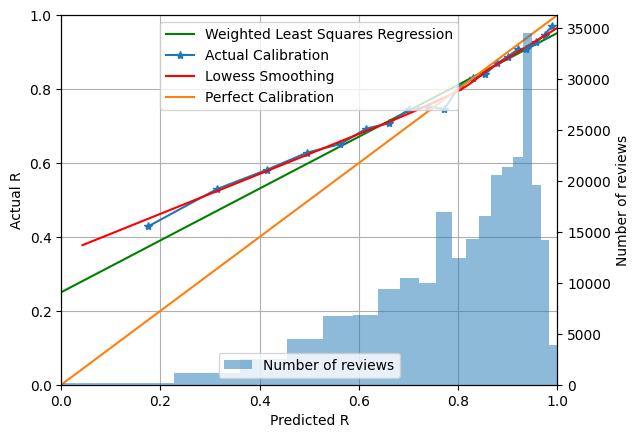

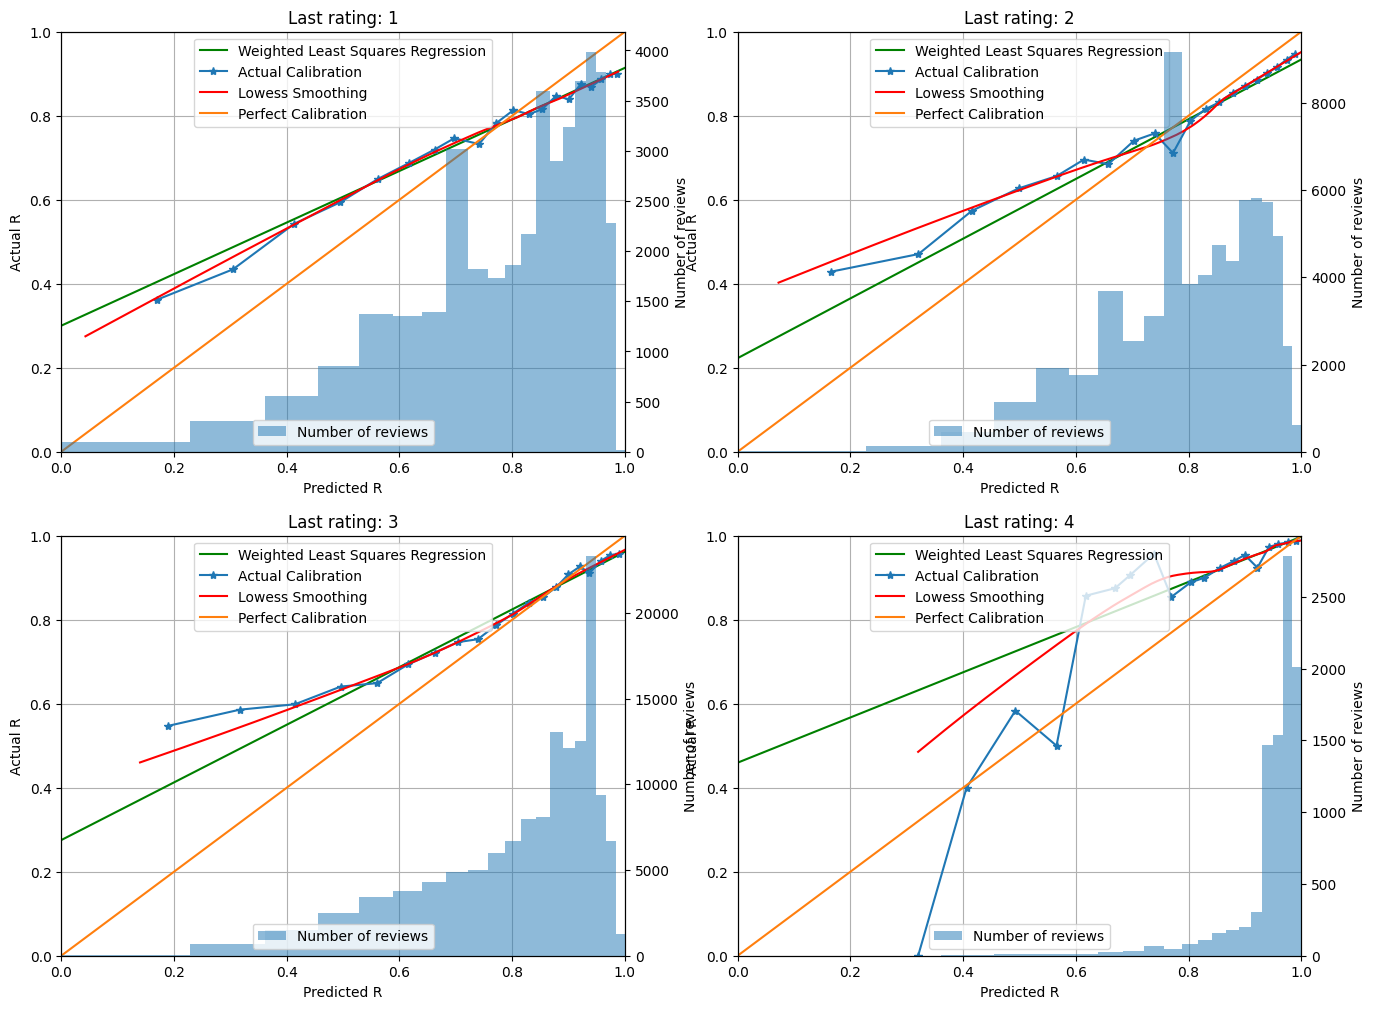

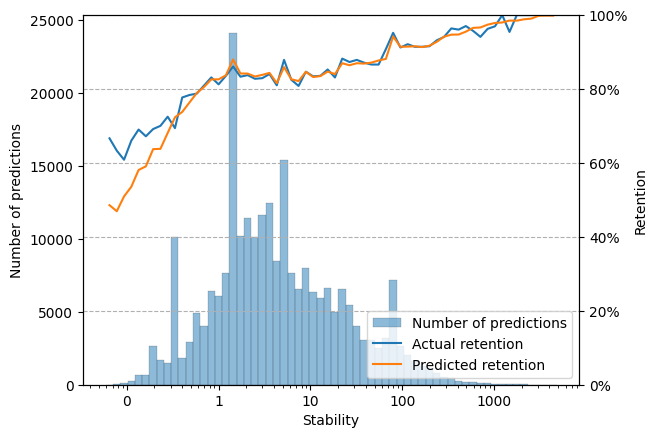

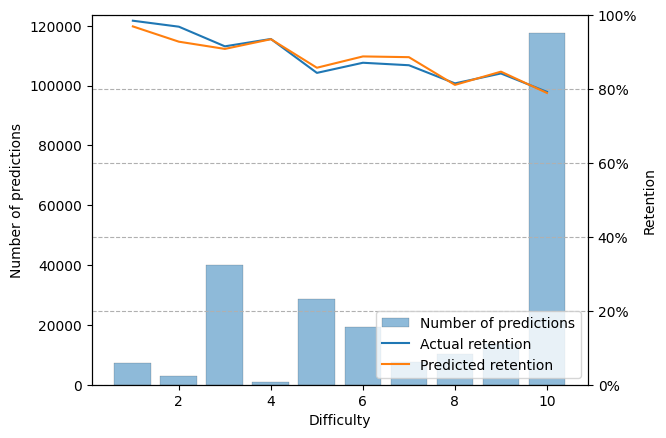

In [6]:
optimizer.define_model()
S0_dataset = dataset_join[dataset_join["i"] == 2].copy()
optimizer.S0_dataset_group = (
    S0_dataset.groupby(by=["r_history", "delta_t"], group_keys=False)
    .agg({"y": ["mean", "count"]})
    .reset_index()
)
optimizer.pretrain(dataset_join.copy(), verbose=False)
optimizer.train(verbose=False)
optimizer.evaluate()
optimizer.calibration_graph()